In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load and Display the dataset
df = pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
# Display the all columns names
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

## Data Preprocessing

In [4]:
# Extracting meaningful and required features
data = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
data.head(2)

,Country,EdLevel,YearsCodePro,Employment,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN


In [5]:
# Rename the column convertedcompyearly to salary for easy to understand
data = data.rename({"ConvertedCompYearly": "Salary"}, axis=1)
data.head(2)

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN


In [6]:
# keep the data where the salary is not null
df = data[data["Salary"].notnull()]
df.head(2)

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0


In [7]:
# Shape of the data
print("******** Dataset Shape ********")
print("\nTotal Rows : ",df.shape[0])
print("Total Columns : ",df.shape[1])
print("\n=====================================")
print("\n***** Dataset Details ******")
print(df.info())
print("\n=====================================")
print("\n***** Descriptive Data *****")
df.describe(include= "all")

******** Dataset Shape ********

Total Rows :  38071
Total Columns :  5


***** Dataset Details ******
<class 'pandas.core.frame.DataFrame'>
Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB
None


***** Descriptive Data *****


,Country,EdLevel,YearsCodePro,Employment,Salary
count,38071,38054,37935,38067,3.807100e+04
unique,159,9,52,13,NaN
top,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN
freq,8707,18056,3136,31502,NaN
mean,NaN,NaN,NaN,NaN,1.707613e+05
std,NaN,NaN,NaN,NaN,7.814132e+05
min,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,3.583200e+04
50%,NaN,NaN,NaN,NaN,6.784500e+04
75%,NaN,NaN,NaN,NaN,1.200000e+05


In [8]:
# Check for the Missing values in the dataset
Missing_per = pd.DataFrame({"Count":df.isnull().sum(),"Percentage": (df.isnull().sum()/df.shape[0])})
Missing_per

,Count,Percentage
Country,0,0.000000
EdLevel,17,0.000447
YearsCodePro,136,0.003572
Employment,4,0.000105
Salary,0,0.000000


In [9]:
# As observe the missing data is very less so drop all the missing values
df = df.dropna()
# Check missing data present or not
df.isna().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [10]:
# Extracting data on the basis of employment is full time
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [11]:
# preprocess the country column data
df["Country"].value_counts()

Country
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: count, Length: 155, dtype: int64

In [12]:
# There are some countries whode data available is too low which can confuse the user
# Create a function set the cutoff and Extract those whose data is more than cutoff and all other coutries map in 'Other'

def Extract_less_data_categories(categories,cutoff):
    country_category_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            country_category_map[categories.index[i]] = categories.index[i]
        else:
            country_category_map[categories.index[i]] = "Other"
    return country_category_map

In [13]:
country_map = Extract_less_data_categories(df["Country"].value_counts() , 400)   # set the cutoff is 400
df["Country"] = df["Country"].map(country_map)
df["Country"].value_counts()

Country
Other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: count, dty

In [14]:
df["Country"] = df["Country"].replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom")
df["Country"] = df["Country"].replace("United States of America","United States")

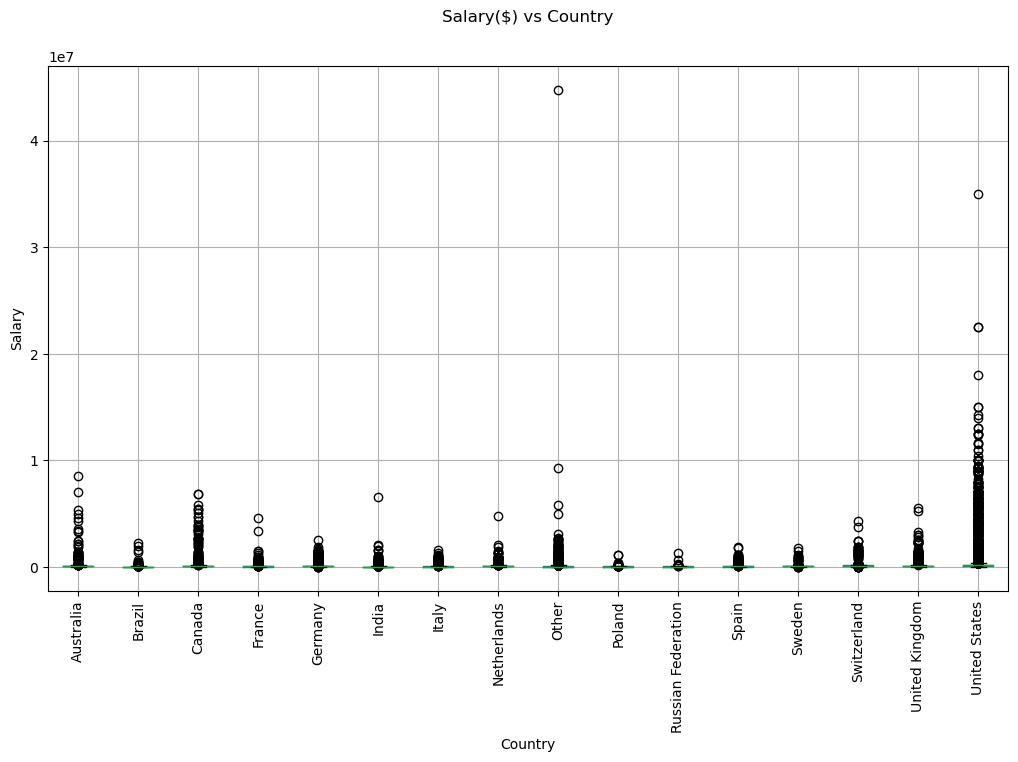

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot("Salary","Country", ax=ax)
plt.title(" ")
plt.suptitle("Salary($) vs Country")
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.show()

In [16]:
# As observe above the data contain more outliers
# Filtering the salary(as per median) where the meaningful and most data present
df = df[df["Salary"] <=250000]
df = df[df["Salary"] >=10000]
df = df[df["Country"] != "Other"]

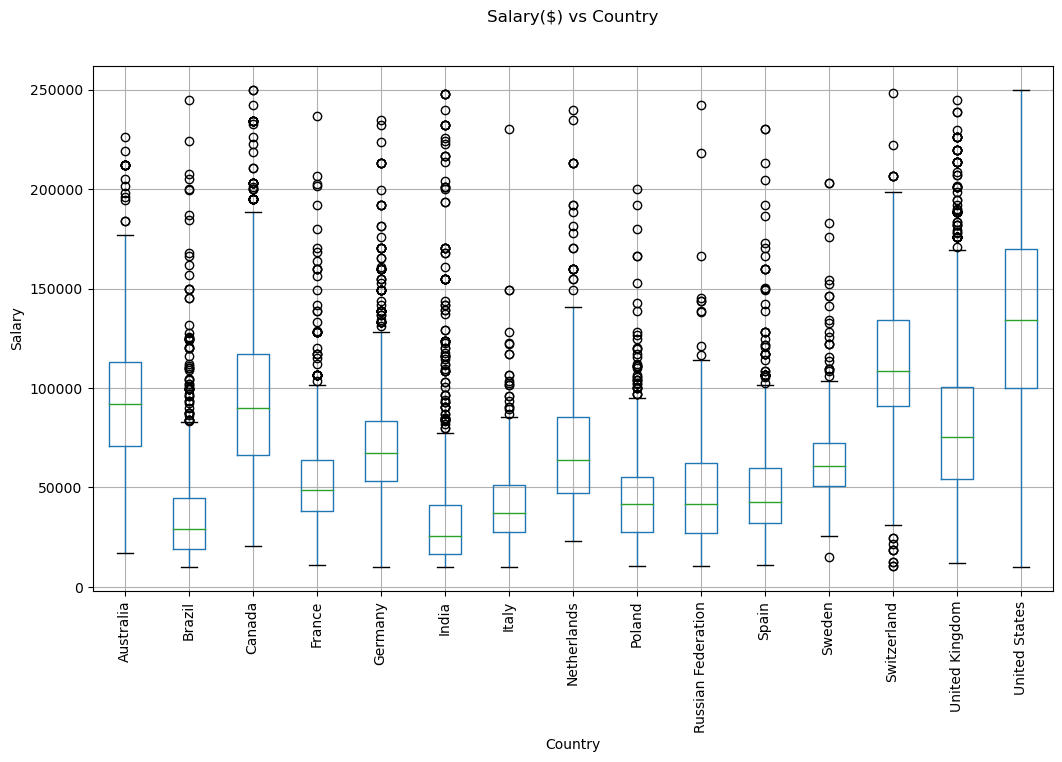

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot("Salary","Country", ax=ax)
plt.title(" ")
plt.suptitle("Salary($) vs Country")
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.show()   # Now most data outliers are removed and we can see box plot

In [18]:
# preproesse of YearsCodePro columns data
df["YearsCodePro"].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [19]:
def clean_experinece(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experinece)

In [20]:
# Now all the data conveted into float
df["YearsCodePro"].unique()

array([ 5. ,  6. ,  2. ,  4. , 20. ,  9. , 14. , 21. , 15. , 25. ,  3. ,
       10. ,  8. , 12. ,  7. , 19. , 17. , 24. ,  1. , 11. , 23. ,  0.5,
       18. , 37. , 46. , 22. , 32. , 13. , 27. , 28. , 16. , 31. , 34. ,
       35. , 26. , 42. , 38. , 30. , 36. , 40. , 41. , 29. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

In [21]:
# preprocess on column EdLevel
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [22]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'doctoral degree' in x:
        return 'Post Graduate'
    return 'Less than a Bachelors'

df["EdLevel"] = df["EdLevel"].apply(clean_education)

In [23]:
# function get correctly applied
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post Graduate'], dtype=object)

## Encoding

In [24]:
labelencoder_ed = LabelEncoder()
df["EdLevel"] = labelencoder_ed.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([2, 0, 1, 3])

In [25]:
labelencoder_co = LabelEncoder()
df["Country"] = labelencoder_co.fit_transform(df["Country"])
df["Country"].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

In [26]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,13,2,5.0,40205.0
8,7,2,6.0,49056.0
10,13,0,2.0,60307.0
12,14,0,5.0,65000.0
21,6,2,4.0,34126.0


## Data Spliting

In [27]:
x = df.drop("Salary", axis=1)
y = df.Salary

## Model_training

In [28]:
# Train the ml model
linear_reg = LinearRegression()
linear_reg.fit(x,y.values )

LinearRegression()

In [29]:
# Calculate the prediction and errors
y_pred = linear_reg.predict(x)
mean_error = np.sqrt(mean_squared_error(y,y_pred))
print("Mean Squared Error :- ",mean_error)

Mean Squared Error :-  44689.67485721425


In [30]:
# As using linear regression error is more try with different model

# train new model
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x,y.values)

DecisionTreeRegressor()

In [31]:
# Generate prediction
y_pred_dt = dec_tree.predict(x)
mean_error_dt = np.sqrt(mean_squared_error(y,y_pred_dt))
print("Mean Squared Error :- ",mean_error_dt)

Mean Squared Error :-  33529.79924079139


In [32]:
# again try with new model
# train the model
ran_for = RandomForestRegressor()
ran_for.fit(x,y.values)

RandomForestRegressor()

In [33]:
y_pred_rf = ran_for.predict(x)
mean_error_rf = np.sqrt(mean_squared_error(y,y_pred_rf))
print("Mean Squared Error :- ",mean_error_rf)

Mean Squared Error :-  33608.55767563271


In [34]:
#as the error still more try with modelevaluation
max_depth = [None,2,4,6,8,10]
param = {"max_depth": max_depth}
regressor =DecisionTreeRegressor(random_state=2)
grid = GridSearchCV(estimator=regressor, param_grid=param, scoring="neg_mean_squared_error")
grid.fit(x,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=2),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [35]:
estimator = grid.best_estimator_
estimator

DecisionTreeRegressor(max_depth=8, random_state=2)

In [36]:
estimator.fit(x,y.values)
y_pred_grid = estimator.predict(x)
mean_error_grid = np.sqrt(mean_squared_error(y.values,y_pred_grid))
print("Mean Squared Error :- ",mean_error_grid)

Mean Squared Error :-  34864.265868320974


In [37]:
model_accuracy = r2_score(y.values,y_pred_grid)
print("Model Accuracy : ",model_accuracy)

Model Accuracy :  0.5847999025786383


## Prediction

In [38]:
x

,Country,EdLevel,YearsCodePro
2,13,2,5.0
8,7,2,6.0
10,13,0,2.0
12,14,0,5.0
21,6,2,4.0
...,...,...,...
73113,14,2,5.0
73116,14,0,16.0
73119,14,0,1.0
73120,10,0,2.0


In [39]:
# pass country degree and year of exp
x = np.array([["United States", "Master’s degree", 10]])
x

array([['United States', 'Master’s degree', '10']], dtype='<U15')

In [40]:
x[:, 0] = labelencoder_co.transform(x[:,0])
x[:, 1] = labelencoder_ed.transform(x[:,1])
x = x.astype(float)
x

array([[14.,  2., 10.]])

In [41]:
y_pred = estimator.predict(x)
y_pred

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([154715.5])

## Save the model

In [42]:
import pickle

In [43]:
data = {"model": estimator, "labelencoder_co": labelencoder_co, "labelencoder_ed": labelencoder_ed}

with open('saved_developer_pro_steps.pkl', 'wb') as file:      #wb:writebinary, rb:readbinary
    pickle.dump(data,file)

In [44]:
with open('saved_developer_pro_steps.pkl', 'rb') as file:
    data = pickle.load(file)

estimator_model_loaded = data["model"]
le_country = data["labelencoder_co"]
le_education = data["labelencoder_ed"]

In [45]:
y_pred = estimator_model_loaded.predict(x)
y_pred

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([154715.5])

#### using above code save the model as observe prediction found same as previous using file saved model

In [46]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
